In [1]:
import pandas as pd

In [2]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [3]:
df

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [4]:
# считаем все-все данные

In [5]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [6]:
train.shape

(15223, 52)

In [7]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [8]:
test.shape

(14910, 51)

In [9]:
# отделим таргет от TRAIN-а

In [10]:
y = train['TARGET']

In [11]:
train = train.drop('TARGET', axis=1)

In [12]:
# соеденим train и test

In [13]:
all_data = pd.concat([train, test])

In [14]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [15]:
# посмотрим типы данных и их заполняемость


In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [17]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [18]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Среднее специальное', 'Неполное среднее', 'Среднее', 'Два и более высших образования', 'Ученая степень'}

MARITAL_STATUS
{'Разведен(а)', 'Вдовец/Вдова', 'Состою в браке', 'Гражданский брак', 'Не состоял в браке'}

GEN_INDUSTRY
{nan, 'Недвижимость', 'Химия/Парфюмерия/Фармацевтика', 'Другие сферы', 'СМИ/Реклама/PR-агенства', 'Развлечения/Искусство', 'Маркетинг', 'Сельское хозяйство', 'Коммунальное хоз-во/Дорожные службы', 'Подбор персонала', 'Транспорт', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'Наука', 'Здравоохранение', 'Страхование', 'Салоны красоты и здоровья', 'Торговля', 'ЧОП/Детективная д-ть', 'Нефтегазовая промышленность', 'Туризм', 'Металлургия/Промышленность/Машиностроение', 'Управляющая компания', 'Государственная служба', 'Информационные технологии', 'Энергетика', 'Логистика', 'Ресторанный бизнес/Общественное питание', 'Сборочные производства', 'Строительство', 'Образование', 'Банк/Финансы'}

GEN_TITLE
{na

In [19]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [20]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [21]:
# причина же что использовалась запятая для разделения не целой части числа

In [22]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [23]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [24]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Среднее специальное', 'Неполное среднее', 'Среднее', 'Два и более высших образования', 'Ученая степень'}

MARITAL_STATUS
{'Разведен(а)', 'Вдовец/Вдова', 'Состою в браке', 'Гражданский брак', 'Не состоял в браке'}

GEN_INDUSTRY
{nan, 'Недвижимость', 'Химия/Парфюмерия/Фармацевтика', 'Другие сферы', 'СМИ/Реклама/PR-агенства', 'Развлечения/Искусство', 'Маркетинг', 'Сельское хозяйство', 'Коммунальное хоз-во/Дорожные службы', 'Подбор персонала', 'Транспорт', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'Наука', 'Здравоохранение', 'Страхование', 'Салоны красоты и здоровья', 'Торговля', 'ЧОП/Детективная д-ть', 'Нефтегазовая промышленность', 'Туризм', 'Металлургия/Промышленность/Машиностроение', 'Управляющая компания', 'Государственная служба', 'Информационные технологии', 'Энергетика', 'Логистика', 'Ресторанный бизнес/Общественное питание', 'Сборочные производства', 'Строительство', 'Образование', 'Банк/Финансы'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [25]:
# Есть ли пропуски в данных? что с ними сделать?

# Ваш код :-)

all_data.GEN_INDUSTRY.fillna('Другое', inplace=True)
all_data.GEN_TITLE.fillna('Другое', inplace=True)
all_data.ORG_TP_STATE.fillna('Другое', inplace=True)
all_data.ORG_TP_FCAPITAL.fillna('Другое', inplace=True)
all_data.JOB_DIR.fillna('Другое', inplace=True)
all_data.TP_PROVINCE.fillna('Другое', inplace=True)
all_data.REGION_NM.fillna('Другое', inplace=True)
all_data.WORK_TIME.fillna(all_data.WORK_TIME.mean(), inplace=True)
all_data.PREVIOUS_CARD_NUM_UTILIZED.fillna(0, inplace=True)

In [26]:
# Как поступить со строковыми переменными?

# Ваш код :-)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

new_cat_features = pd.DataFrame()
cat_features=[]
for col in all_data.columns: # перебираем все столбцы
    if str(all_data[col].dtype) == 'object': # если тип столбца - object
        cat_features.append(col)
        all_data[col] = all_data[col].astype('category')
print(cat_features)

all_data = pd.get_dummies(all_data, sparse=True)

['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM']


In [27]:
# В итоге должны получиться данные без пропусков и только числовые
all_data.info(verbose=True)

<class 'pandas.core.sparse.frame.SparseDataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 449 columns):
AGREEMENT_RK                                              int64
AGE                                                       int64
SOCSTATUS_WORK_FL                                         int64
SOCSTATUS_PENS_FL                                         int64
GENDER                                                    int64
CHILD_TOTAL                                               int64
DEPENDANTS                                                int64
PERSONAL_INCOME                                           float64
REG_FACT_FL                                               int64
FACT_POST_FL                                              int64
REG_POST_FL                                               int64
REG_FACT_POST_FL                                          int64
REG_FACT_POST_TP_FL                                       int64
FL_PRESENCE_FL                             

In [50]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)
train = all_data[0:len(y)]
test  = all_data[len(y)-1:-1]
print(y.shape, train.shape, test.shape, all_data.shape)

(15223,) (15223, 449) (14910, 449) (30133, 449)


In [29]:
# Сделать hold-out sampling на train выборке
from sklearn.model_selection import train_test_split

# test_size=0.3, random_state=42

# Ваш код :-)
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)

In [30]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ваш код :-)
predict = {}
proba = {}
models = {}
clsf = []

for dtc in [DecisionTreeClassifier(random_state=42),
           RandomForestClassifier(random_state=42),
           LogisticRegression(random_state=42)]:
    dtc.fit(X_train, y_train)
    cl = str(type(dtc)).split('\'')[1].split('.')[3]
    clsf.append(cl)
    models[cl] = dtc
    predict[cl] = dtc.predict(X_test)
    proba[cl] = dtc.predict_proba(X_test)
print(clsf)

['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression']


In [31]:
# Посчитать метрики стандартные
# accuracy, precision, recall

# Ваш код :-)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

metrics = pd.DataFrame(columns=['precision', 'recall', 'accuracy', 'AUC', 'CrossValAUC'], index = clsf)
for cl in clsf:
    metrics.precision[cl] = precision_score(y_test, predict[cl])
    metrics.recall[cl]    = recall_score(y_test, predict[cl])
    metrics.accuracy[cl]  = accuracy_score(y_test, predict[cl])
           
metrics[['precision', 'recall', 'accuracy']]

C:\Users\Sergey\Documents\WinPython\python-3.5.3.amd64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,precision,recall,accuracy
DecisionTreeClassifier,0.17446,0.174775,0.799212
RandomForestClassifier,0.25,0.00540541,0.877162
LogisticRegression,0,0,0.878476


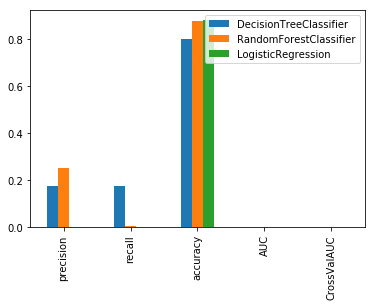

In [32]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

# Ваш код :-)

%matplotlib inline
from matplotlib import pyplot as plt

metrics.T.plot(kind='bar')

,AUC
DecisionTreeClassifier,0.530184
RandomForestClassifier,0.582463
LogisticRegression,0.525295


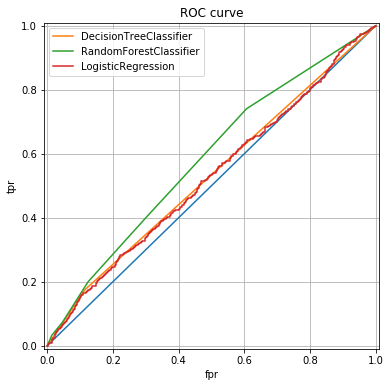

In [33]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

# Ваш код :-)

plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
for cl in clsf:
    fpr, tpr, thresholds = roc_curve(y_test, proba[cl][:,1])
    metrics.AUC[cl] = roc_auc_score(y_test, proba[cl][:,1])
    plt.plot(fpr, tpr, label=cl)
plt.legend()
metrics[['AUC']]

In [36]:
from sklearn.model_selection import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

# Ваш код :-)
import numpy as np
for cl in models:
    metrics.CrossValAUC[cl] = np.average(
        cross_val_score(
            models[cl],
            train,
            y,
            scoring='roc_auc',
            cv=10
        )
    )
metrics[['CrossValAUC']]

,CrossValAUC
DecisionTreeClassifier,0.524403
RandomForestClassifier,0.580567
LogisticRegression,0.515397


In [52]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)
best = metrics[metrics.CrossValAUC == metrics.CrossValAUC.max()].index.values[0]
print(best)
pd.DataFrame(models[best].predict_proba(test)[:,1])

RandomForestClassifier


,0
0,0.1
1,0.0
2,0.1
3,0.1
4,0.1
5,0.2
6,0.0
7,0.2
8,0.0
9,0.0
